In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
x= df.iloc[: ,0:4]
y= df.iloc[:, -1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test= train_test_split(x,y,train_size=0.8,random_state=1)
x_test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
14,15,5.8,4.0,1.2
98,99,5.1,2.5,3.0
75,76,6.6,3.0,4.4
16,17,5.4,3.9,1.3
131,132,7.9,3.8,6.4
56,57,6.3,3.3,4.7
141,142,6.9,3.1,5.1
44,45,5.1,3.8,1.9
29,30,4.7,3.2,1.6
120,121,6.9,3.2,5.7


In [7]:
from sklearn.preprocessing import LabelEncoder
la_object = LabelEncoder()
y= la_object.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [11]:
y_predicted = model.predict(x_test)

In [12]:
y_predicted

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [13]:
model.score(x_test,y_test)

1.0

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
cm= confusion_matrix(y_test,y_predicted)

In [15]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [16]:
c1_report=classification_report(y_test,y_predicted)

In [17]:
c1_report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00         6\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [18]:
#creating dataframe aaray for a array-formatted confusion matrix
cm_df= pd.DataFrame(cm,
                    index = ['SETOSA' , 'VERSICOLR', 'VIRGINICA'],
                    columns = ['SETOSA' , 'VERSICOLR', 'VIRGINICA'])

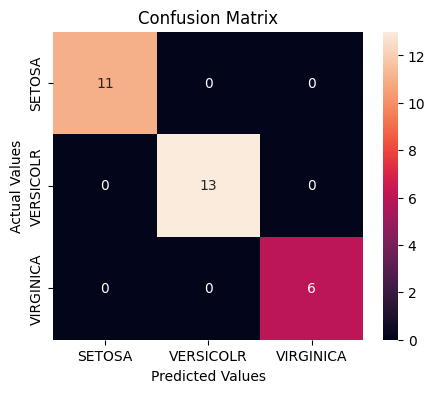

In [19]:
#plotting th confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df , annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [20]:
def accuracy_cm(tp,fn,fp,tn):
  return(tp+tn)/(tp+fp+tn+fn)

def precision_cm(tp,fn,fp,tn):
  return tp/(tp+fp)

def recall_cm(tp,fn,fp,tn):
  return tp/(tp+fn)

def f1_score_cm(tp,fn,fp,tn):
  return (2/((1/recall_cm(tp,fn,fp,tn)+precision_cm(tp,fn,fp,tn))))

def error_rate_cm(tp,fn,fp,tn):
  return 1-accuracy_cm(tp,fn,fp,tn)  

In [21]:
#for Virginica
tp = cm[2][2]
fn = cm [2][0] + cm[2][1]
fp = cm [0][2] + cm[1][2]
tn = cm [0][0] + cm[0][1] + cm[1][1]

print("For Virginica \n")
print("Accuracy : ",accuracy_cm(tp,fn,fp,tn))
print("Precision : ",precision_cm(tp,fn,fp,tn))
print("Recall : ",recall_cm(tp,fn,fp,tn))
print("F1-Score  : ",f1_score_cm(tp,fn,fp,tn))
print("Error rate : ",error_rate_cm(tp,fn,fp,tn))

For Virginica 

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-Score  :  1.0
Error rate :  0.0
